In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', 140)
pd.set_option('display.max_rows', 100)
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('drought.csv')
df.head()

,map_date,state_abb,valid_start,valid_end,stat_fmt,drought_lvl,area_pct,area_total,pop_pct,pop_total
0,20210713,AK,7/13/2021,7/19/2021,1,None,74.35,433133.18,33.91,240644.16
1,20210713,AK,7/13/2021,7/19/2021,1,D0,25.65,149435.11,66.09,468985.84
2,20210713,AK,7/13/2021,7/19/2021,1,D1,0.00,0.00,0.00,0.00
3,20210713,AK,7/13/2021,7/19/2021,1,D2,0.00,0.00,0.00,0.00
4,20210713,AK,7/13/2021,7/19/2021,1,D3,0.00,0.00,0.00,0.00


In [3]:
df.shape

(325728, 10)

### df.info()

In [4]:
df.isnull().sum()

map_date          0
state_abb         0
valid_start       0
valid_end         0
stat_fmt          0
drought_lvl       0
area_pct          0
area_total     3215
pop_pct           0
pop_total      3612
dtype: int64

In [5]:
df.drought_lvl.value_counts()

None    54288
D0      54288
D1      54288
D2      54288
D3      54288
D4      54288
Name: drought_lvl, dtype: int64

In [6]:
#df.dropna(subset=["drought_lvl"],inplace=True)
#df["drought_lvl"] = df["drought_lvl"].replace(np.NaN, 5)

In [7]:
df.isnull().sum()

map_date          0
state_abb         0
valid_start       0
valid_end         0
stat_fmt          0
drought_lvl       0
area_pct          0
area_total     3215
pop_pct           0
pop_total      3612
dtype: int64

In [8]:
df

,map_date,state_abb,valid_start,valid_end,stat_fmt,drought_lvl,area_pct,area_total,pop_pct,pop_total
0,20210713,AK,7/13/2021,7/19/2021,1,None,74.35,433133.18,33.91,240644.16
1,20210713,AK,7/13/2021,7/19/2021,1,D0,25.65,149435.11,66.09,468985.84
2,20210713,AK,7/13/2021,7/19/2021,1,D1,0.00,0.00,0.00,0.00
3,20210713,AK,7/13/2021,7/19/2021,1,D2,0.00,0.00,0.00,0.00
4,20210713,AK,7/13/2021,7/19/2021,1,D3,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
325723,20010717,WY,7/17/2001,7/23/2001,1,D0,94.32,92247.61,92.52,521486.54
325724,20010717,WY,7/17/2001,7/23/2001,1,D1,64.46,63036.18,56.43,318055.16
325725,20010717,WY,7/17/2001,7/23/2001,1,D2,48.25,47191.37,39.84,224562.24
325726,20010717,WY,7/17/2001,7/23/2001,1,D3,9.32,9117.74,5.41,30469.18


In [9]:
#Cheking single unique values
def counts(dff):
    for column in dff.columns:
        print(f"{dff[column].value_counts()} \n ======================================== \n ========================================")
counts(df)

20210713    312
20080520    312
20080506    312
20080429    312
20080422    312
           ... 
20141014    312
20141007    312
20140930    312
20140923    312
20010717    312
Name: map_date, Length: 1044, dtype: int64 
AK    6264
AL    6264
ND    6264
NE    6264
NH    6264
NJ    6264
NM    6264
NV    6264
NY    6264
OH    6264
OK    6264
OR    6264
PA    6264
PR    6264
RI    6264
SC    6264
SD    6264
TN    6264
TX    6264
UT    6264
VA    6264
VT    6264
WA    6264
WI    6264
WV    6264
NC    6264
MT    6264
MS    6264
IA    6264
AR    6264
AZ    6264
CA    6264
CO    6264
CT    6264
DC    6264
DE    6264
FL    6264
GA    6264
HI    6264
ID    6264
MO    6264
IL    6264
IN    6264
KS    6264
KY    6264
LA    6264
MA    6264
MD    6264
ME    6264
MI    6264
MN    6264
WY    6264
Name: state_abb, dtype: int64 
7/13/2021     312
5/20/2008     312
5/6/2008      312
4/29/2008     312
4/22/2008     312
             ... 
10/14/2014    312
10/7/2014     312
9/30/2014     312
9/23/2014     3

In [10]:
df.drop("stat_fmt",axis=1,inplace=True)

stat_fmt has single unique value, so we need to drop the stat_fmt column because it will reduce the learning rate of our model

In [11]:
#checking for dublicate 
df[df.duplicated()]

,map_date,state_abb,valid_start,valid_end,drought_lvl,area_pct,area_total,pop_pct,pop_total


No dublicate in the data set 

In [12]:
def split_date(dff,column):
    dff[column] = pd.to_datetime(dff[column])
    dff["day_"+column]=dff[column].dt.day
    dff["month_"+column]=dff[column].dt.month
    dff["year_"+column]=dff[column].dt.year
    return df

founction converting date into datetime and splliting it into day,month and year

In [13]:
split_date(df,"map_date").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325728 entries, 0 to 325727
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   map_date        325728 non-null  datetime64[ns]
 1   state_abb       325728 non-null  object        
 2   valid_start     325728 non-null  object        
 3   valid_end       325728 non-null  object        
 4   drought_lvl     325728 non-null  object        
 5   area_pct        325728 non-null  float64       
 6   area_total      322513 non-null  float64       
 7   pop_pct         325728 non-null  float64       
 8   pop_total       322116 non-null  float64       
 9   day_map_date    325728 non-null  int64         
 10  month_map_date  325728 non-null  int64         
 11  year_map_date   325728 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 29.8+ MB


In [14]:
split_date(df,"valid_start")

,map_date,state_abb,valid_start,valid_end,drought_lvl,area_pct,area_total,pop_pct,pop_total,day_map_date,month_map_date,year_map_date,day_valid_start,month_valid_start,year_valid_start
0,1970-01-01 00:00:00.020210713,AK,2021-07-13,7/19/2021,None,74.35,433133.18,33.91,240644.16,1,1,1970,13,7,2021
1,1970-01-01 00:00:00.020210713,AK,2021-07-13,7/19/2021,D0,25.65,149435.11,66.09,468985.84,1,1,1970,13,7,2021
2,1970-01-01 00:00:00.020210713,AK,2021-07-13,7/19/2021,D1,0.00,0.00,0.00,0.00,1,1,1970,13,7,2021
3,1970-01-01 00:00:00.020210713,AK,2021-07-13,7/19/2021,D2,0.00,0.00,0.00,0.00,1,1,1970,13,7,2021
4,1970-01-01 00:00:00.020210713,AK,2021-07-13,7/19/2021,D3,0.00,0.00,0.00,0.00,1,1,1970,13,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325723,1970-01-01 00:00:00.020010717,WY,2001-07-17,7/23/2001,D0,94.32,92247.61,92.52,521486.54,1,1,1970,17,7,2001
325724,1970-01-01 00:00:00.020010717,WY,2001-07-17,7/23/2001,D1,64.46,63036.18,56.43,318055.16,1,1,1970,17,7,2001
325725,1970-01-01 00:00:00.020010717,WY,2001-07-17,7/23/2001,D2,48.25,47191.37,39.84,224562.24,1,1,1970,17,7,2001
325726,1970-01-01 00:00:00.020010717,WY,2001-07-17,7/23/2001,D3,9.32,9117.74,5.41,30469.18,1,1,1970,17,7,2001


In [15]:
split_date(df,"valid_end")

,map_date,state_abb,valid_start,valid_end,drought_lvl,area_pct,area_total,pop_pct,pop_total,day_map_date,month_map_date,year_map_date,day_valid_start,month_valid_start,year_valid_start,day_valid_end,month_valid_end,year_valid_end
0,1970-01-01 00:00:00.020210713,AK,2021-07-13,2021-07-19,None,74.35,433133.18,33.91,240644.16,1,1,1970,13,7,2021,19,7,2021
1,1970-01-01 00:00:00.020210713,AK,2021-07-13,2021-07-19,D0,25.65,149435.11,66.09,468985.84,1,1,1970,13,7,2021,19,7,2021
2,1970-01-01 00:00:00.020210713,AK,2021-07-13,2021-07-19,D1,0.00,0.00,0.00,0.00,1,1,1970,13,7,2021,19,7,2021
3,1970-01-01 00:00:00.020210713,AK,2021-07-13,2021-07-19,D2,0.00,0.00,0.00,0.00,1,1,1970,13,7,2021,19,7,2021
4,1970-01-01 00:00:00.020210713,AK,2021-07-13,2021-07-19,D3,0.00,0.00,0.00,0.00,1,1,1970,13,7,2021,19,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325723,1970-01-01 00:00:00.020010717,WY,2001-07-17,2001-07-23,D0,94.32,92247.61,92.52,521486.54,1,1,1970,17,7,2001,23,7,2001
325724,1970-01-01 00:00:00.020010717,WY,2001-07-17,2001-07-23,D1,64.46,63036.18,56.43,318055.16,1,1,1970,17,7,2001,23,7,2001
325725,1970-01-01 00:00:00.020010717,WY,2001-07-17,2001-07-23,D2,48.25,47191.37,39.84,224562.24,1,1,1970,17,7,2001,23,7,2001
325726,1970-01-01 00:00:00.020010717,WY,2001-07-17,2001-07-23,D3,9.32,9117.74,5.41,30469.18,1,1,1970,17,7,2001,23,7,2001


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325728 entries, 0 to 325727
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   map_date           325728 non-null  datetime64[ns]
 1   state_abb          325728 non-null  object        
 2   valid_start        325728 non-null  datetime64[ns]
 3   valid_end          325728 non-null  datetime64[ns]
 4   drought_lvl        325728 non-null  object        
 5   area_pct           325728 non-null  float64       
 6   area_total         322513 non-null  float64       
 7   pop_pct            325728 non-null  float64       
 8   pop_total          322116 non-null  float64       
 9   day_map_date       325728 non-null  int64         
 10  month_map_date     325728 non-null  int64         
 11  year_map_date      325728 non-null  int64         
 12  day_valid_start    325728 non-null  int64         
 13  month_valid_start  325728 non-null  int64   

In [17]:
df.drop(["map_date","valid_start","valid_end"],axis=1,inplace=True)

droping the three datetime of columns map_date,valid_start and valid_end

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325728 entries, 0 to 325727
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   state_abb          325728 non-null  object 
 1   drought_lvl        325728 non-null  object 
 2   area_pct           325728 non-null  float64
 3   area_total         322513 non-null  float64
 4   pop_pct            325728 non-null  float64
 5   pop_total          322116 non-null  float64
 6   day_map_date       325728 non-null  int64  
 7   month_map_date     325728 non-null  int64  
 8   year_map_date      325728 non-null  int64  
 9   day_valid_start    325728 non-null  int64  
 10  month_valid_start  325728 non-null  int64  
 11  year_valid_start   325728 non-null  int64  
 12  day_valid_end      325728 non-null  int64  
 13  month_valid_end    325728 non-null  int64  
 14  year_valid_end     325728 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 37

In [19]:
df.isnull().sum()

state_abb               0
drought_lvl             0
area_pct                0
area_total           3215
pop_pct                 0
pop_total            3612
day_map_date            0
month_map_date          0
year_map_date           0
day_valid_start         0
month_valid_start       0
year_valid_start        0
day_valid_end           0
month_valid_end         0
year_valid_end          0
dtype: int64

In [20]:
df['pop_total'] = df['pop_total'].fillna(value=df['pop_total'].mean())

In [21]:
df['area_total']

0         433133.18
1         149435.11
2              0.00
3              0.00
4              0.00
            ...    
325723     92247.61
325724     63036.18
325725     47191.37
325726      9117.74
325727         0.00
Name: area_total, Length: 325728, dtype: float64

In [22]:
df['area_total'] = df['area_total'].fillna(value=df['area_total'].mean())

filling the missing value for area_tota and pop_pct

In [23]:
df['area_total'].isnull().sum()

0

In [24]:
df["drought_lvl"] = df["drought_lvl"].replace({"D0":0,"D1":1,"D2":2,"D3":3,"D4":4,"None":5})

In [25]:
# no more missing value 
df.isnull().sum()

state_abb            0
drought_lvl          0
area_pct             0
area_total           0
pop_pct              0
pop_total            0
day_map_date         0
month_map_date       0
year_map_date        0
day_valid_start      0
month_valid_start    0
year_valid_start     0
day_valid_end        0
month_valid_end      0
year_valid_end       0
dtype: int64

In [26]:
df['drought_lvl'].value_counts()

5    54288
0    54288
1    54288
2    54288
3    54288
4    54288
Name: drought_lvl, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325728 entries, 0 to 325727
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   state_abb          325728 non-null  object 
 1   drought_lvl        325728 non-null  int64  
 2   area_pct           325728 non-null  float64
 3   area_total         325728 non-null  float64
 4   pop_pct            325728 non-null  float64
 5   pop_total          325728 non-null  float64
 6   day_map_date       325728 non-null  int64  
 7   month_map_date     325728 non-null  int64  
 8   year_map_date      325728 non-null  int64  
 9   day_valid_start    325728 non-null  int64  
 10  month_valid_start  325728 non-null  int64  
 11  year_valid_start   325728 non-null  int64  
 12  day_valid_end      325728 non-null  int64  
 13  month_valid_end    325728 non-null  int64  
 14  year_valid_end     325728 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 3

## EDA

<AxesSubplot:xlabel='drought_lvl', ylabel='count'>

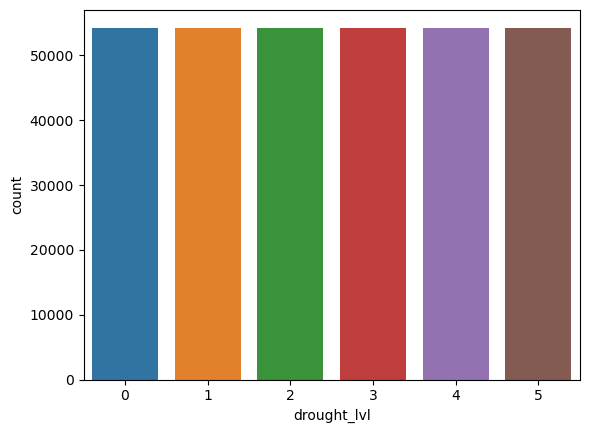

In [28]:
df['drought_lvl'].value_counts()
sns.countplot(x = 'drought_lvl',data=df)

This chart is use checking if the dataset is a balanced classification dataset, the data is mondrataly sampled from the plot which means it's a balance classification data

In [29]:
df

,state_abb,drought_lvl,area_pct,area_total,pop_pct,pop_total,day_map_date,month_map_date,year_map_date,day_valid_start,month_valid_start,year_valid_start,day_valid_end,month_valid_end,year_valid_end
0,AK,5,74.35,433133.18,33.91,240644.16,1,1,1970,13,7,2021,19,7,2021
1,AK,0,25.65,149435.11,66.09,468985.84,1,1,1970,13,7,2021,19,7,2021
2,AK,1,0.00,0.00,0.00,0.00,1,1,1970,13,7,2021,19,7,2021
3,AK,2,0.00,0.00,0.00,0.00,1,1,1970,13,7,2021,19,7,2021
4,AK,3,0.00,0.00,0.00,0.00,1,1,1970,13,7,2021,19,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325723,WY,0,94.32,92247.61,92.52,521486.54,1,1,1970,17,7,2001,23,7,2001
325724,WY,1,64.46,63036.18,56.43,318055.16,1,1,1970,17,7,2001,23,7,2001
325725,WY,2,48.25,47191.37,39.84,224562.24,1,1,1970,17,7,2001,23,7,2001
325726,WY,3,9.32,9117.74,5.41,30469.18,1,1,1970,17,7,2001,23,7,2001


In [30]:
corr = df.corr()

In [31]:
# selecting the features that has 0 correlation upward with our target Total MVPA
above_01 = corr[corr['drought_lvl'].abs() > 0.0]
above_01

,drought_lvl,area_pct,area_total,pop_pct,pop_total,day_map_date,month_map_date,year_map_date,day_valid_start,month_valid_start,year_valid_start,day_valid_end,month_valid_end,year_valid_end
drought_lvl,1.000000e+00,0.075847,-0.003089,0.100406,0.051063,NaN,NaN,NaN,1.154790e-18,9.557007e-18,-4.846788e-17,3.824793e-19,1.061113e-17,-3.046419e-17
area_pct,7.584711e-02,1.000000,0.599124,0.962431,0.548785,NaN,NaN,NaN,-4.930944e-04,1.035724e-02,-3.092476e-02,4.748934e-04,1.184649e-02,-3.099955e-02
area_total,-3.088706e-03,0.599124,1.000000,0.568971,0.455902,NaN,NaN,NaN,-6.021262e-04,5.001286e-03,-1.756882e-02,-9.603332e-05,5.763399e-03,-1.760703e-02
pop_pct,1.004063e-01,0.962431,0.568971,1.000000,0.579004,NaN,NaN,NaN,-2.155550e-04,1.135458e-02,-2.775177e-02,7.412365e-04,1.277803e-02,-2.782352e-02
pop_total,5.106325e-02,0.548785,0.455902,0.579004,1.000000,NaN,NaN,NaN,-3.304075e-04,6.473439e-03,-3.974320e-03,6.666862e-04,7.065255e-03,-4.007421e-03
day_valid_start,1.154790e-18,-0.000493,-0.000602,-0.000216,-0.000330,NaN,NaN,NaN,1.000000e+00,7.578012e-03,-8.030720e-03,5.497986e-02,8.013983e-03,-4.127334e-03
month_valid_start,9.557007e-18,0.010357,0.005001,0.011355,0.006473,NaN,NaN,NaN,7.578012e-03,1.000000e+00,-7.280776e-02,1.766023e-02,9.144186e-01,-6.859702e-02
year_valid_start,-4.846788e-17,-0.030925,-0.017569,-0.027752,-0.003974,NaN,NaN,NaN,-8.030720e-03,-7.280776e-02,1.000000e+00,-3.289929e-03,-7.055281e-02,9.997749e-01
day_valid_end,3.824793e-19,0.000475,-0.000096,0.000741,0.000667,NaN,NaN,NaN,5.497986e-02,1.766023e-02,-3.289929e-03,1.000000e+00,1.146013e-02,-6.913765e-03
month_valid_end,1.061113e-17,0.011846,0.005763,0.012778,0.007065,NaN,NaN,NaN,8.013983e-03,9.144186e-01,-7.055281e-02,1.146013e-02,1.000000e+00,-7.479492e-02


In [32]:
# List of correlated featuers with their pecentage
corr['drought_lvl'].sort_values(ascending=False)[1:20].to_frame()

,drought_lvl
pop_pct,1.004063e-01
area_pct,7.584711e-02
pop_total,5.106325e-02
month_valid_end,1.061113e-17
month_valid_start,9.557007e-18
day_valid_start,1.154790e-18
day_valid_end,3.824793e-19
year_valid_end,-3.046419e-17
year_valid_start,-4.846788e-17
area_total,-3.088706e-03


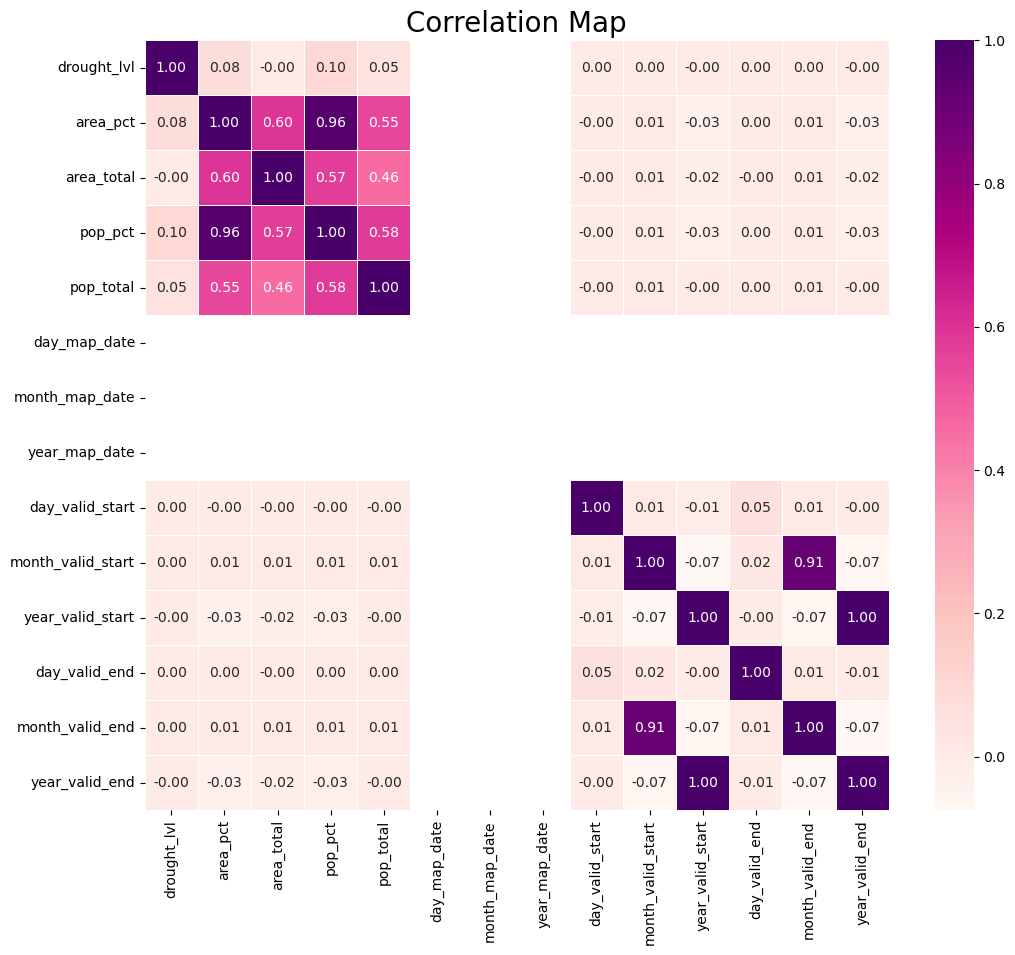

In [33]:
#correlation map
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, linewidth=".5", cmap="RdPu", fmt=".2f", ax = ax)
plt.title("Correlation Map",fontsize=20)
plt.show()

In [34]:
def outliers_box(df):
    for col in df.columns:
        plt.figure()
        print(sns.boxplot(df[col]))

AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


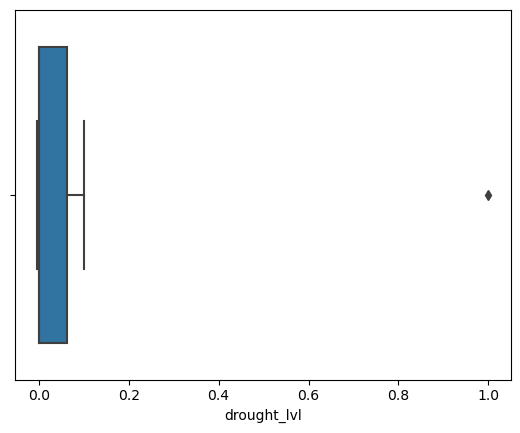

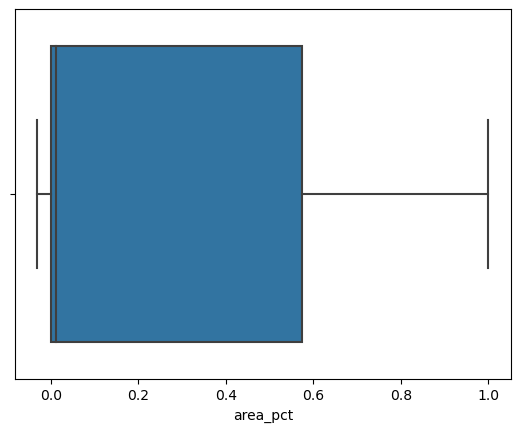

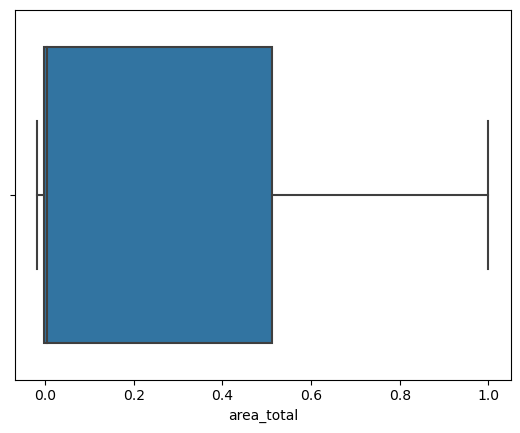

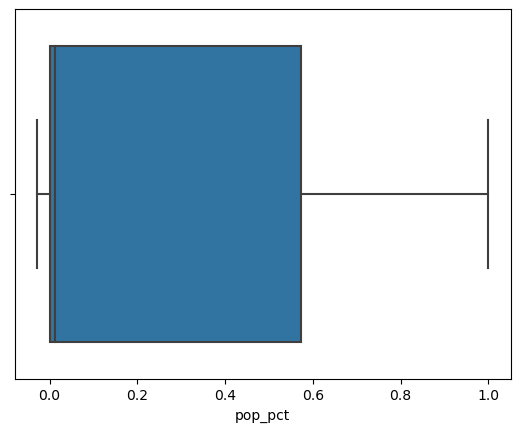

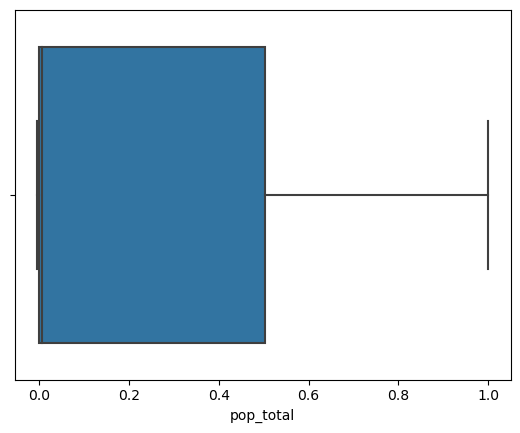

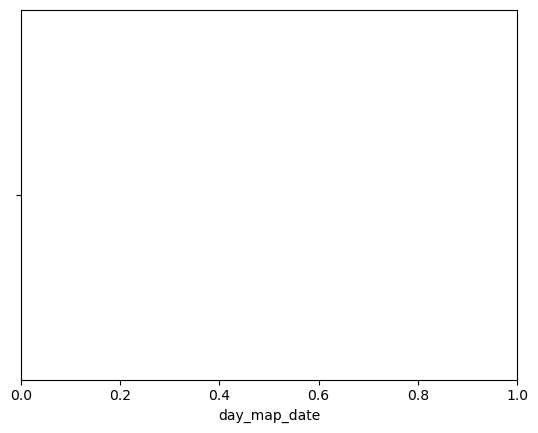

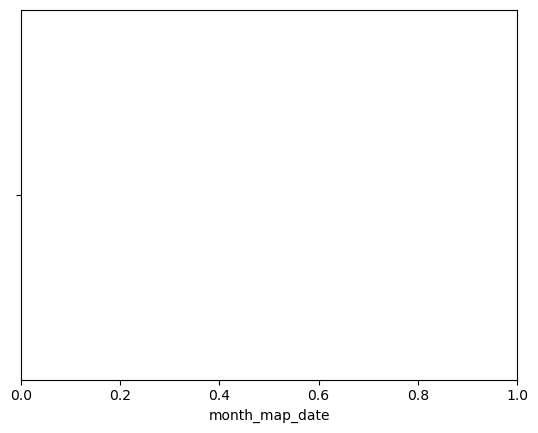

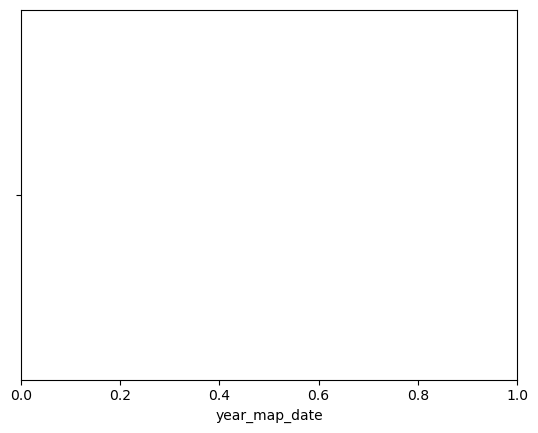

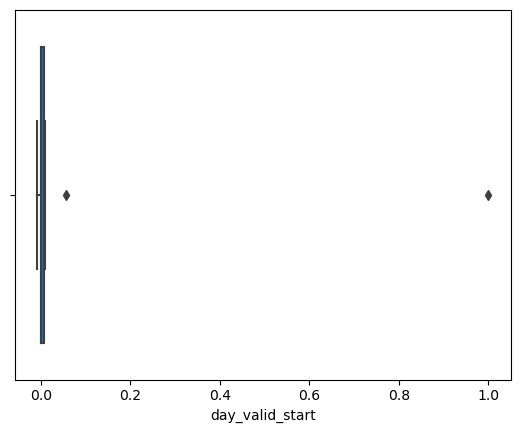

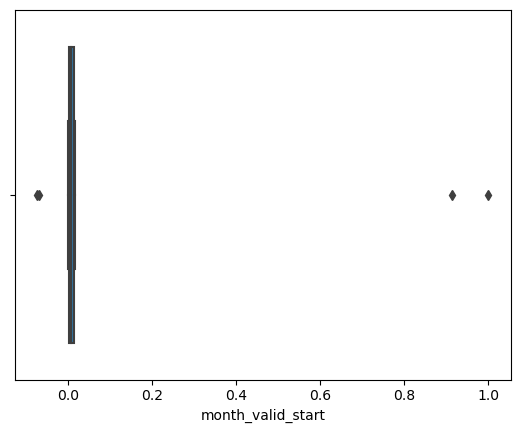

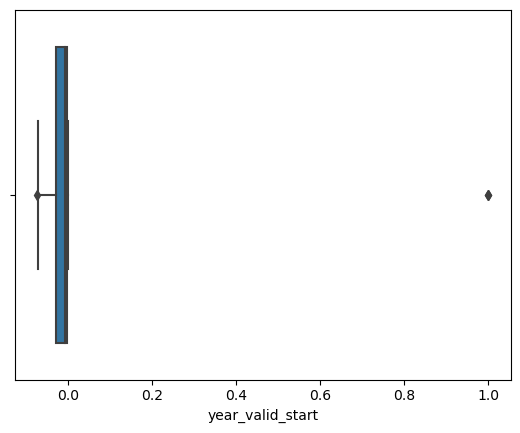

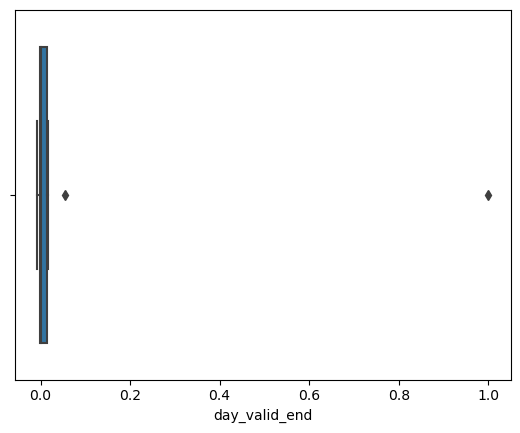

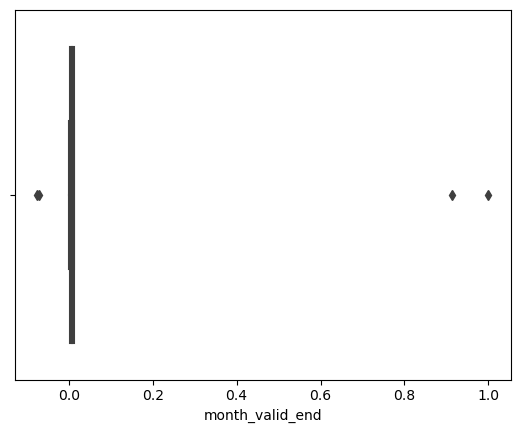

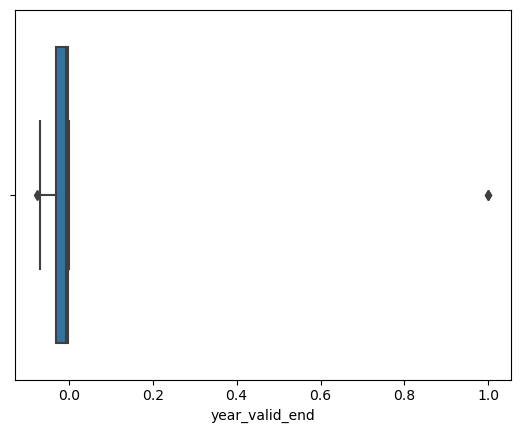

In [35]:
corr =  df.corr()
outliers_box(corr)

In [36]:
# converting categorical columns to numerical with labelencoder 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler
drought_df  = df.copy()
label_encoder = LabelEncoder()
drought_df['state_abb'] = label_encoder.fit_transform(drought_df['state_abb'])

In [37]:
drought_df.head()

,state_abb,drought_lvl,area_pct,area_total,pop_pct,pop_total,day_map_date,month_map_date,year_map_date,day_valid_start,month_valid_start,year_valid_start,day_valid_end,month_valid_end,year_valid_end
0,0,5,74.35,433133.18,33.91,240644.16,1,1,1970,13,7,2021,19,7,2021
1,0,0,25.65,149435.11,66.09,468985.84,1,1,1970,13,7,2021,19,7,2021
2,0,1,0.00,0.00,0.00,0.00,1,1,1970,13,7,2021,19,7,2021
3,0,2,0.00,0.00,0.00,0.00,1,1,1970,13,7,2021,19,7,2021
4,0,3,0.00,0.00,0.00,0.00,1,1,1970,13,7,2021,19,7,2021


In [38]:
#Data Segmentation 
X= drought_df.drop(["drought_lvl","day_map_date","month_map_date","year_map_date","day_valid_start","month_valid_start","area_pct"], axis=1)
#.drop(['Steps Counts','Steps Per Minute',"Steps Average Counts","Vector Magnitude CPM","Vector Magnitude Counts","Total MVPA","Moderate","% in Moderate","% in MVPA","% in Vigorous","% in Very Vigorous","% in Light","DIAGNOSIS_YEAR","GROUP"], axis = 1)
y=  drought_df["drought_lvl"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=45, test_size=0.2)

In [39]:
X

,state_abb,area_total,pop_pct,pop_total,year_valid_start,day_valid_end,month_valid_end,year_valid_end
0,0,433133.18,33.91,240644.16,2021,19,7,2021
1,0,149435.11,66.09,468985.84,2021,19,7,2021
2,0,0.00,0.00,0.00,2021,19,7,2021
3,0,0.00,0.00,0.00,2021,19,7,2021
4,0,0.00,0.00,0.00,2021,19,7,2021
...,...,...,...,...,...,...,...,...
325723,51,92247.61,92.52,521486.54,2001,23,7,2001
325724,51,63036.18,56.43,318055.16,2001,23,7,2001
325725,51,47191.37,39.84,224562.24,2001,23,7,2001
325726,51,9117.74,5.41,30469.18,2001,23,7,2001


In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325728 entries, 0 to 325727
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   state_abb         325728 non-null  int32  
 1   area_total        325728 non-null  float64
 2   pop_pct           325728 non-null  float64
 3   pop_total         325728 non-null  float64
 4   year_valid_start  325728 non-null  int64  
 5   day_valid_end     325728 non-null  int64  
 6   month_valid_end   325728 non-null  int64  
 7   year_valid_end    325728 non-null  int64  
dtypes: float64(3), int32(1), int64(4)
memory usage: 18.6 MB


### Data Reduction and Clustering 

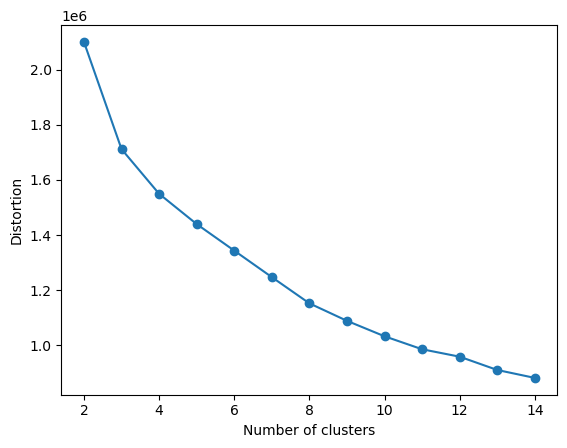

In [41]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine the number of clusters to use
distortions = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X_pca)
    distortions.append(kmeans.inertia_)
plt.plot(range(2, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [42]:
# Apply KMeans++ clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=0)
clusters = kmeans.fit_predict(X_pca)
print(clusters)

[4 0 2 ... 1 1 1]


### making the clusters created a feature

In [43]:
X["kmeans_scaled"] = clusters
y=  drought_df["drought_lvl"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=45, test_size=0.2)

In [44]:
X

,state_abb,area_total,pop_pct,pop_total,year_valid_start,day_valid_end,month_valid_end,year_valid_end,kmeans_scaled
0,0,433133.18,33.91,240644.16,2021,19,7,2021,4
1,0,149435.11,66.09,468985.84,2021,19,7,2021,0
2,0,0.00,0.00,0.00,2021,19,7,2021,2
3,0,0.00,0.00,0.00,2021,19,7,2021,2
4,0,0.00,0.00,0.00,2021,19,7,2021,2
...,...,...,...,...,...,...,...,...,...
325723,51,92247.61,92.52,521486.54,2001,23,7,2001,0
325724,51,63036.18,56.43,318055.16,2001,23,7,2001,1
325725,51,47191.37,39.84,224562.24,2001,23,7,2001,1
325726,51,9117.74,5.41,30469.18,2001,23,7,2001,1


### Using Lgbm model After Clustering

In [45]:
# XGBRegressor
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


xgb = LGBMClassifier(learning_rate = 0.1,n_estimators = 200)
xgb.fit(X_train.values,y_train.values)
y_pre = xgb.predict(X_test)

In [46]:
xgb = LGBMClassifier(learning_rate = 0.1,n_estimators = 200)
xgb.fit(X_train.values,y_train.values)
y_pre = xgb.predict(X_test)

In [47]:
from sklearn.metrics import f1_score
#y_pred_class = y_pred_pos > threshold
f1_score(y_test,y_pre,average='macro')

0.43911559269620976

In [48]:
accuracy_score(y_test,y_pre)

0.4545789457526172

In [49]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pre,average='macro')

0.5271043534980543

Multi-class Confusion Matrix:
[[5394  704  127 1651 1365 1663]
 [2071 2497  289 2284 2951  645]
 [ 789  707 1726 2698 4639  321]
 [ 197  245  213 3754 6389  134]
 [   0    1    2 2956 7862   69]
 [1034  356  158  179  695 8381]]


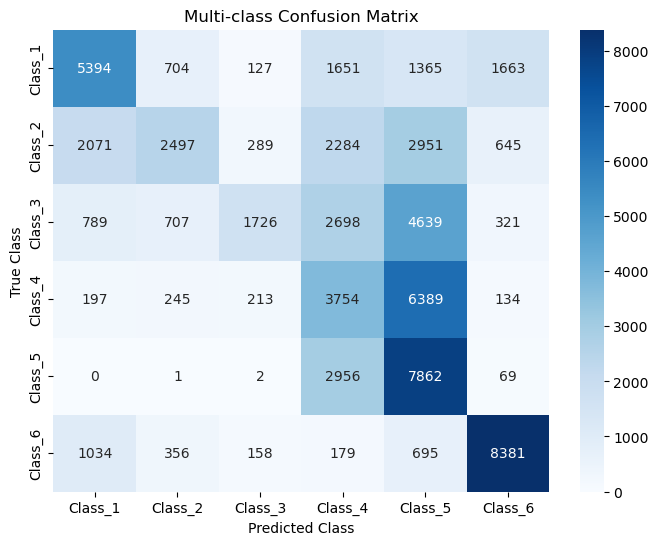

In [50]:
# Compute the multi-class confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pre)

# Display the confusion matrix
print("Multi-class Confusion Matrix:")
print(conf_matrix)

# Define class labels
classes = ['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6']

# Plot the heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Multi-class Confusion Matrix')
plt.show()

In [51]:
from sklearn.metrics import classification_report

In [52]:
accuracy = accuracy_score(y_test, y_pre)
class_report = classification_report(y_test, y_pre, digits=4)
print(f"Accuracy: {accuracy:.4f}")
print(class_report)

Accuracy: 0.4546
              precision    recall  f1-score   support

           0     0.5687    0.4947    0.5291     10904
           1     0.5537    0.2326    0.3275     10737
           2     0.6863    0.1586    0.2577     10880
           3     0.2776    0.3434    0.3070     10932
           4     0.3289    0.7219    0.4520     10890
           5     0.7474    0.7758    0.7614     10803

    accuracy                         0.4546     65146
   macro avg     0.5271    0.4545    0.4391     65146
weighted avg     0.5266    0.4546    0.4389     65146

